In [15]:
!kaggle datasets download -d rupakroy/online-payments-fraud-detection-dataset 

#'https://www.kaggle.com/datasets/rupakroy/online-payments-fraud-detection-dataset?select=PS_20174392719_1491204439457_log.csv'

100%|████████████████████████████████████████| 178M/178M [02:28<00:00, 1.22MB/s]
100%|████████████████████████████████████████| 178M/178M [02:28<00:00, 1.25MB/s]


In [16]:
! unzip online-payments-fraud-detection-dataset.zip

Archive:  online-payments-fraud-detection-dataset.zip
  inflating: PS_20174392719_1491204439457_log.csv  


In [57]:
#importing neccesary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

dataset = 'PS_20174392719_1491204439457_log.csv'

### Loading Dataset to pandas dataframe

In [34]:
df_init = pd.read_csv(dataset)
df_init.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [21]:
df_init.shape

(6362620, 11)

In [58]:
df_init.head(4)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0


### Data Cleaning & EDA

In [59]:
df_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [60]:
# check for null values
df_init.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

Observation: we observe that we have no null value

In [61]:
df_init[df_init['isFraud']==1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


In [66]:
df_init['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

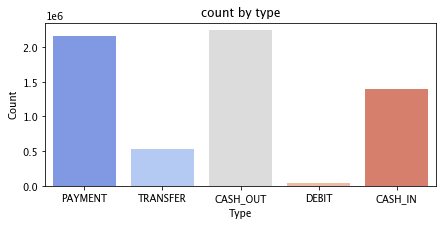

In [69]:
#visualize count by payment types

plt.figure(figsize=(7,3))
plt.title('count by type')
sns.countplot(data=df_init, x='type', palette='coolwarm')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

/Users/ama/mambaforge/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/ama/mambaforge/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
    Parameters
  File "/var/folders/nf/g_4jhvds3hl6w0x8k1y827z80000gn/T/ipykernel_7052/581090850.py", line 5, in <module>
    sns.distplot(amount_val, ax=ax[0], color='r')
  File "/Users/ama/mambaforge/lib/python3.10/site-packages/seaborn/distributions.py", line 2687, in distplot
  File "/Users/ama/mambaforge/lib/python3.10/site-packages/seaborn/_decorators.py", line 46, in inner_f
  File "/Users/ama/mambaforge/lib/python3.10/site-packages/seaborn/distributions.py", line 1770, in kdeplot
    weights : vector or key in ``data``
  File "/Users/ama/mambaforge/lib/python3.10/site-packages/seaborn/distributions.py", line 928, in plot_univariate_density
    # Always share the evaluation grid when stacking
  File "/Users/ama/mambaforge/lib/python3.10/site-packages/seaborn/distributions.py", line 303, in _compute_univariate_density
    data_var

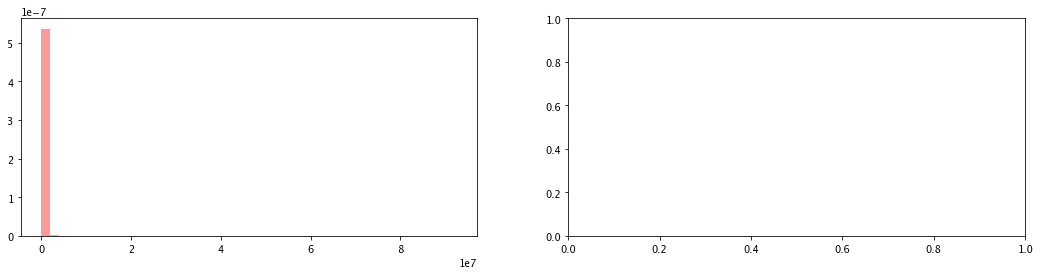

In [75]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))
amount_val = df_init['amount'].values
time_val = df_init['step'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Step', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])
plt.show()

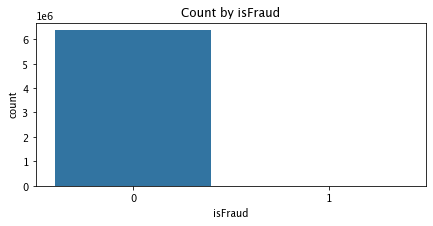

In [77]:
# Count fraud by 0 and 1
plt.figure(figsize=(7,3))
plt.title('Count by isFraud')
sns.countplot(data=df_init, x='isFraud')
plt.xlabel('isFraud')
plt.ylabel('count')
plt.show()


Observation: We realized that theres a huge imbalance between the classes 0 and 1